In [129]:
import os
import numpy as np
import geopandas as gpd

import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Wedge, Polygon
from mpl_toolkits.basemap import Basemap
from matplotlib.collections import PatchCollection
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes

In [4]:
def sayHi(num):
    data_dir='D:\hh\@进行中的工作\ESSD_Wheat_Multi-vars\分区标定'      
    run_years, code,level2=num[0],num[1],num[2]
    
    if code in replace_code.keys():
        code=replace_code[code]
    
    p_file='D:/hh/@进行中的工作/ESSD_Wheat_Multi-vars/分区标定/cropdata/calibrated//%d-%d_%d_V2-3_L%d.txt'%(run_years[0],run_years[-1],code,level2)
    if os.path.exists(p_file):
        pars=np.loadtxt(p_file)
#         print('Calibrated crop pars %d-%d_%d_V2-3_L%d.txt 已读取'%(run_years[0],run_years[-1],code,level2))
    else:
#         print('no calibrated crop pars %d-%d_%d_V2-3_L%d.txt'%(run_years[0],run_years[-1],code,level2))
        return None

    dicts=dict(zip(['tsum1','tsum2','DTSM','SLATB', 'SPAN', 'AMAXTB', 'TMPFTB', 'TMNFTB',' CVO', 'shift_dvs'],pars))
 
#     i_file='amgt/calibrated//%d-%d_%d_V2-3_L%d.txt'%(run_years[0],run_years[-1],code,level2)
#     if os.path.exists(i_file):
#         irragation=np.loadtxt(i_file)# sm1,sm2,sm3,v1,v2,v3
#         print('Calibrated irragation 已读取')
#     else:
#         print('no calibrated irragation')
#         return None

    return dicts

replace_code = {56768: 56571,
                56651: 56571,
                56598: 57508,
                56778: 56571,
                57517: 57411,
                57625: 57508,
                57432: 57326,
                57512: 57411,
                52876: 52983,
                52868: 52983,
                53914: 57002,
                53817: 53930} 

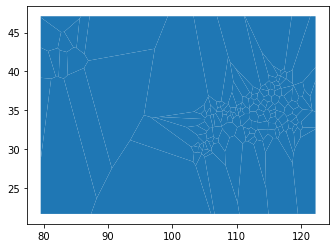

In [5]:
shp = 'D:/hh/@进行中的工作/ESSD_Wheat_Multi-vars/分区标定/站点_研究区_voronoi.shp'
data = gpd.read_file(shp,encoding ='UTF-8')
data.plot()
plt.show()#简单展示

# data_new=data[['区站号','lon','lat','站名','geometry']]
# data_new['区站号']=data_new['区站号'].astype(int)
# data_new = data_new.set_index("区站号")
# data_new

In [6]:
data_new=data[['区站号','lon','lat','站名','geometry']]
data_new['区站号']=data_new['区站号'].astype(int)
data_new = data_new.set_index("区站号")

for code in data_new.index:
    for years in [[2007,2009],[2010,2012],[2013,2015]][1:2]:
        for l in [1,2,3]:
            num=[years,code,l]
            result=sayHi(num)
            if result is None:
                continue
            for key,value in  result.items():
                try:
                    data_new['%s_L%d'%(key, l)][code]=value
                except:
                    data_new['%s_L%d'%(key, l)]=None
                    data_new['%s_L%d'%(key, l)][code]=value
data_new.to_file('D:/hh/@进行中的工作/ESSD_Wheat_Multi-vars/分区标定/cropdata/%d-%d_pars.shp'%(years[0],years[1]),encoding ='UTF-8')

## TSUM1

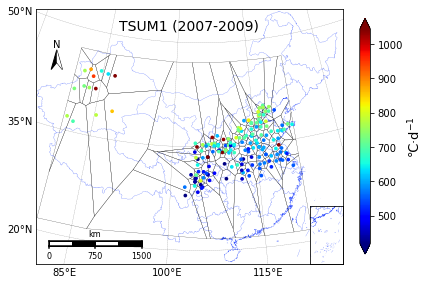

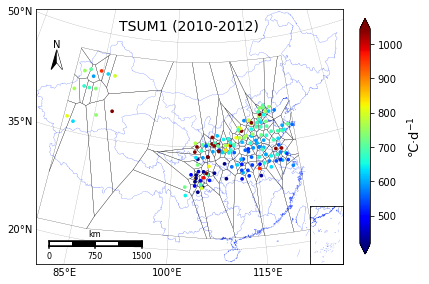

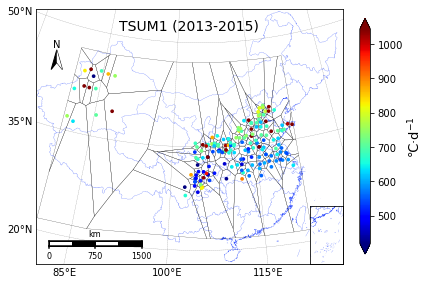

In [204]:
for years in [[2007,2009],[2010,2012],[2013,2015]][:]:
    fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(6,6))
    # m=Basemap(rsphere=(6378137.00,6356752.31414),llcrnrlon=79, llcrnrlat=14.5, \
    #       urcrnrlon=146.5, urcrnrlat=53, projection='aea', \
    #       lat_1=25, lat_2=47, lon_0=105, ax = ax)
    m = Basemap(rsphere=(6378137.00,6356752.31414),llcrnrlon=81, llcrnrlat=15, \
        urcrnrlon=138, urcrnrlat=51.5, projection='aea', \
        lat_1=25, lat_2=47, lon_0=105, ax = ax)

    m.readshapefile('D:/hh/矢量边界/中国9段线边界','China',drawbounds=True,zorder=2,linewidth=0.2,color='#304ffe')
    m.readshapefile('D:/hh/@进行中的工作/ESSD_Wheat_Multi-vars/分区标定/cropdata/%d-%d_pars'%(years[0],years[1]), \
                    'pars',drawbounds=True,zorder=2,linewidth=0.2,color='k')    
    cmap=plt.cm.jet#.reversed()

    item='tsum1_L1'
    norm=plt.Normalize(int(np.percentile(data_new.tsum1_L1,5)),int(np.percentile(data_new.tsum1_L1,95)))
    parallels = np.arange(20.,90,15.)
    m.drawparallels(parallels,labels=[1,0,0,0],fontsize=10, zorder=1, linewidth=0.2) # 绘制纬线

    meridians = np.arange(70.,140.,15.)
    m.drawmeridians(meridians,labels=[0,0,0,1],fontsize=10, zorder=1, linewidth=0.2) # 绘制经线
    zips=zip(m.pars_info, m.pars)
    patches   = []
    for info, shape in zips:
      try:
        color=cmap(norm(int(float(info['%s'%item]))))
#         patches.append( Polygon(np.array(shape), True, color=color) )
        patches.append( Circle(m(info['lon'],info['lat']),30000, color=color)) 
        
      except:
        pass

#     pc = PatchCollection(patches, match_original=True, edgecolor=None, zorder=1)
    pc = PatchCollection(patches, match_original=True, edgecolor=None, zorder=3)
    ax.add_collection(pc)

    # 比例尺 
    m.drawmapscale(89, 19.8, 117.5, 36, 1500, units='km',barstyle='fancy',format='%d',fontsize=8,zorder=4)

    #指北针
    offset = 0.01*(m.ymax-m.ymin)+0.01*(m.xmax-m.xmin)
    x,y=m(72,46)
    x=x+2*offset
    y=y-offset
    ax.fill([x,x+offset,x,x-offset,x],[y,y-3.5*offset,y-2.25*offset,y-3.5*offset,y],ec='k',fc='None',zorder=3)
    ax.fill([x,x+offset,x,x],[y,y-3.5*offset,y-2.25*offset,y],ec='None',fc='w',zorder=3)
    ax.fill([x,x,x-offset,x],[y,y-2.25*offset,y-3.5*offset,y],ec='None',fc='k',zorder=3)
    ax.text(x,y+0.5*offset,'N',horizontalalignment='center',fontsize=10,zorder=3)

    ######局部小地图：九段线区域########
    axins = zoomed_inset_axes(ax, 0.38, loc = 4, borderpad=0)
    axins.set_xlim(108, 122.5)
    axins.set_ylim(3, 25)

    map2 = Basemap(rsphere=(6378137.00,6356752.31414),llcrnrlon = 108, llcrnrlat = 3, urcrnrlon = 122.5, \
                   urcrnrlat = 25,projection='aea', lat_1=25, lat_2=47, lon_0=105, ax = axins)                     
    shpfile = 'D:/hh/矢量边界/中国9段线边界'             
    map2.readshapefile(shpfile, 'China',linewidth=0.2,color='#304ffe')              
    mark_inset(ax, axins, loc1=2, loc2=4, fc = "none", ec = "none")
    #####################################    
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    # sm.set_array(colvals)
    cb=fig.colorbar(sm, ax=ax,fraction=0.032,extend='both')
    font={'size':13}
    # cb.set_label('Relative error',fontdict=font) #设置colorbar的标签字体及其大小
    cb.set_label('%s'%'$\mathrm{℃·d}^{-1}$',fontdict=font) #设置colorbar的标签字体及其大小
    plt.text(0.5,0.92,'TSUM1 (%d-%d)'%(years[0],years[1]), fontsize=14, transform=ax.transAxes, \
             horizontalalignment='center')
    fig.savefig('D:/hh/@进行中的工作/ESSD_Wheat_Multi-vars/分区标定/标定png/%d-%d_TSUM1.png'% \
                (years[0],years[1]),dpi=600,bbox_inches='tight')

## TSUM2

In [7]:
data_new.tsum2_L1.min(),data_new.tsum2_L1.max(),np.percentile(data_new.tsum2_L1,25),np.percentile(data_new.tsum2_L1,95)

(600.0, 1418.75, 704.052734, 1092.8084780000002)

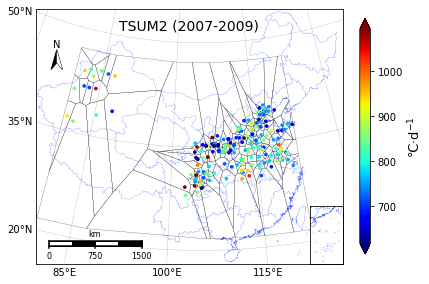

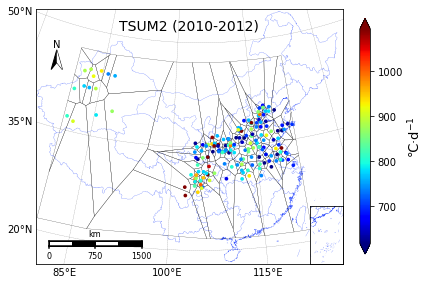

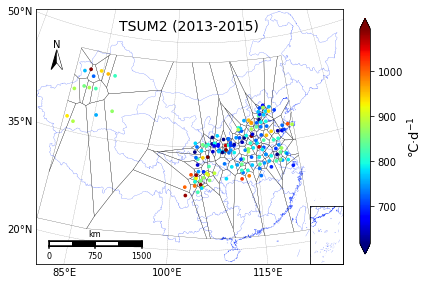

In [8]:
for years in [[2007,2009],[2010,2012],[2013,2015]][:]:
    fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(6,6))
    # m=Basemap(rsphere=(6378137.00,6356752.31414),llcrnrlon=79, llcrnrlat=14.5, \
    #       urcrnrlon=146.5, urcrnrlat=53, projection='aea', \
    #       lat_1=25, lat_2=47, lon_0=105, ax = ax)
    m = Basemap(rsphere=(6378137.00,6356752.31414),llcrnrlon=81, llcrnrlat=15, \
        urcrnrlon=138, urcrnrlat=51.5, projection='aea', \
        lat_1=25, lat_2=47, lon_0=105, ax = ax)

    m.readshapefile('D:/hh/矢量边界/中国9段线边界','China',drawbounds=True,zorder=2,linewidth=0.2,color='#304ffe')
    m.readshapefile('D:/hh/@进行中的工作/ESSD_Wheat_Multi-vars/分区标定/cropdata/%d-%d_pars'%(years[0],years[1]), \
                    'pars',drawbounds=True,zorder=2,linewidth=0.2,color='k')  
    cmap=plt.cm.jet#.reversed()

    item='tsum2_L1'
    norm=plt.Normalize(int(np.percentile(data_new.tsum2_L1,5)),int(np.percentile(data_new.tsum2_L1,95)))
    parallels = np.arange(20.,90,15.)
    m.drawparallels(parallels,labels=[1,0,0,0],fontsize=10, zorder=1, linewidth=0.2) # 绘制纬线

    meridians = np.arange(70.,140.,15.)
    m.drawmeridians(meridians,labels=[0,0,0,1],fontsize=10, zorder=1, linewidth=0.2) # 绘制经线
    zips=zip(m.pars_info, m.pars)
    patches   = []
    
    #用点代替实际的polygon显示颜色
    for info, shape in zips:
      try:
        color=cmap(norm(int(float(info['%s'%item]))))
#         patches.append( Polygon(np.array(shape), True, color=color) )
        patches.append( Circle(m(info['lon'],info['lat']),30000, color=color)) 
      except:
        pass

#     pc = PatchCollection(patches, match_original=True, edgecolor=None, zorder=1)
    pc = PatchCollection(patches, match_original=True, edgecolor=None, zorder=3)
    ax.add_collection(pc)

    # 比例尺 
    m.drawmapscale(89, 19.8, 117.5, 36, 1500, units='km',barstyle='fancy',format='%d',fontsize=8,zorder=4)

    #指北针
    offset = 0.01*(m.ymax-m.ymin)+0.01*(m.xmax-m.xmin)
    x,y=m(72,46)
    x=x+2*offset
    y=y-offset
    ax.fill([x,x+offset,x,x-offset,x],[y,y-3.5*offset,y-2.25*offset,y-3.5*offset,y],ec='k',fc='None',zorder=3)
    ax.fill([x,x+offset,x,x],[y,y-3.5*offset,y-2.25*offset,y],ec='None',fc='w',zorder=3)
    ax.fill([x,x,x-offset,x],[y,y-2.25*offset,y-3.5*offset,y],ec='None',fc='k',zorder=3)
    ax.text(x,y+0.5*offset,'N',horizontalalignment='center',fontsize=10,zorder=3)

    ######局部小地图：九段线区域########
    axins = zoomed_inset_axes(ax, 0.38, loc = 4, borderpad=0)
    axins.set_xlim(108, 122.5)
    axins.set_ylim(3, 25)

    map2 = Basemap(rsphere=(6378137.00,6356752.31414),llcrnrlon = 108, llcrnrlat = 3, urcrnrlon = 122.5, \
                   urcrnrlat = 25,projection='aea', lat_1=25, lat_2=47, lon_0=105, ax = axins)                     
    shpfile = 'D:/hh/矢量边界/中国9段线边界'             
    map2.readshapefile(shpfile, 'China',linewidth=0.2,color='#304ffe')            
    mark_inset(ax, axins, loc1=2, loc2=4, fc = "none", ec = "none")
    #####################################    
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    # sm.set_array(colvals)
    cb=fig.colorbar(sm, ax=ax,fraction=0.032,extend='both')
    font={'size':13}
    # cb.set_label('Relative error',fontdict=font) #设置colorbar的标签字体及其大小
    cb.set_label('%s'%'$\mathrm{℃·d}^{-1}$',fontdict=font) #设置colorbar的标签字体及其大小
    plt.text(0.5,0.92,'TSUM2 (%d-%d)'%(years[0],years[1]), fontsize=14, transform=ax.transAxes, \
             horizontalalignment='center')
    fig.savefig('D:/hh/@进行中的工作/ESSD_Wheat_Multi-vars/分区标定/标定png/%d-%d_TSUM2.png'% \
                (years[0],years[1]),dpi=600,bbox_inches='tight')

In [11]:
data_new.columns

Index(['lon', 'lat', '站名', 'geometry', 'tsum1_L1', 'tsum2_L1', 'DTSM_L1',
       'SLATB_L1', 'SPAN_L1', 'AMAXTB_L1', 'TMPFTB_L1', 'TMNFTB_L1', ' CVO_L1',
       'shift_dvs_L1', 'tsum1_L2', 'tsum2_L2', 'DTSM_L2', 'SLATB_L2',
       'SPAN_L2', 'AMAXTB_L2', 'TMPFTB_L2', 'TMNFTB_L2', ' CVO_L2',
       'shift_dvs_L2', 'tsum1_L3', 'tsum2_L3', 'DTSM_L3', 'SLATB_L3',
       'SPAN_L3', 'AMAXTB_L3', 'TMPFTB_L3', 'TMNFTB_L3', ' CVO_L3',
       'shift_dvs_L3'],
      dtype='object')

实际上，在空跑模型时，是可以生成一个参数空间分布栅格的，按照那个思路生成出图或许更好些

In [6]:
%%writefile  mp_test1.py
# -*- coding: utf-8 -*-
"""
Created on Wed Jan  6 11:36:32 2021
新疆参数的差异在于TBASE叶片生长的最低温设为了-10
@author: Administrator
"""
# import gdal
import os
import time
import datetime
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import geopandas as gpd
import scipy.stats as ss
import csv
from multiprocessing import Pool #导入进程池

from osgeo import gdal
import matplotlib.colors as mcolors
from pcse.util import Afgen
from pcse.models import Wofost71_PP,Wofost71_WLP_FD
from pcse.base import ParameterProvider
from pcse.fileinput import YAMLAgroManagementReader, CABOFileReader
from pcse.fileinput import YAMLCropDataProvider,CABOWeatherDataProvider
from pcse.util import WOFOST71SiteDataProvider
from netCDF4 import Dataset,date2index


    
def mycallback(x):

    csv_write.writerow(x)  



def sayHi(num):
     
    data_dir='D:\hh\@进行中的工作\ESSD_Wheat_Multi-vars\分区标定'   
    # data_dir='H:\hh\@进行中的工作\ESSD_Wheat_Multi-vars\分区标定' 
    
    x,y,lon,lat,df_v,par_lst,level2=num[0],num[1],num[2],num[3],num[4],num[5],num[6]
#     sited,cropd,soild=par_lst
   
    code=df_v['区站号']
    if code in replace_code.keys():
        code=replace_code[code]
    
    p_file='cropdata/calibrated//%d-%d_%d_V2-3_L%d.txt'%(run_years[0],run_years[-1],code,level2)
    if os.path.exists(p_file):
        pars=np.loadtxt(p_file)
        print('Calibrated crop pars %d-%d_%d_V2-3_L%d.txt 已读取'%(run_years[0],run_years[-1],code,level2))
    else:
        print('no calibrated crop pars %d-%d_%d_V2-3_L%d.txt'%(run_years[0],run_years[-1],code,level2))
        pars=[829,699,0,0.0019,22,32,22,1,0.7,0.66]


    soil_pars=[df_v['SMW'],df_v['SMFCF'],df_v['SM0'],df_v['CRAIRC']]
    
    # tsum1,tsum2,SLATB, SPAN, AMAXTB, TMPFTB, TMNFTB, CVO, shift_dvs=pars
    tsum1,tsum2,DTSM,SLATB, SPAN, AMAXTB, TMPFTB, TMNFTB, CVO, shift_dvs=pars
    

    i_file='amgt/calibrated//%d-%d_%d_V2-3_L%d.txt'%(run_years[0],run_years[-1],code,level2)
    if os.path.exists(i_file):
        irragation=np.loadtxt(i_file)
        print('Calibrated irragation 已读取')
    else:
        print('no calibrated irragation')
        # irragation=[0.2,4]
 
    return [x,y]+list(pars)+list(soil_pars)+list(irragation)



replace_code = {56768: 56571,
                56651: 56571,
                56598: 57508,
                56778: 56571,
                57517: 57411,
                57625: 57508,
                57432: 57326,
                57512: 57411,
                52876: 52983,
                52868: 52983,
                53914: 57002,
                53817: 53930} 

# run_years=[2001,2002,2003]
# run_years=[2004,2005,2006]
run_years=[2007,2008,2009]  
# run_years=[2010,2011,2012]
# run_years=[2013,2014,2015]  



# In[]
if __name__ == '__main__':
    
    data_dir='D:\hh\@进行中的工作\ESSD_Wheat_Multi-vars\分区标定'
  
    ds=gdal.Open('D:/hh/@进行中的工作/ESSD_Wheat_Multi-vars/分区标定/11省分区范围/tif_01dg_clip.tif')
    data=ds.ReadAsArray()
    gt=ds.GetGeoTransform()
    
    gdf = gpd.read_file(data_dir+'/站点生育期整理_3期标定_join_yield_xie_and_soil_he_临县补齐.shp',encoding ='UTF-8')
    
    ds_mask=gdal.Open('D:/hh/@进行中的工作/ESSD_Wheat_Multi-vars/Mask/mask01/union_mask_01deg.tif')
    mask=ds_mask.ReadAsArray()
    gt_mask=ds_mask.GetGeoTransform()
    ds_mean_yield=gdal.Open('D:/hh/@进行中的工作/ESSD_Wheat_Multi-vars/分区标定/县域_mean_yield.tif')
    mean_yield=ds_mean_yield.ReadAsArray()
    gt_yield=ds_mean_yield.GetGeoTransform()
    yield_class_dct=np.load('final_dct.npy',allow_pickle=True).item()
    nums=[]
    for x in range(ds.RasterXSize):
        for y in range(ds.RasterYSize):
            lon=gt[0] + x * gt[1]
            lat=gt[3] + y * gt[5]
            #用一个mask去掩膜，但分辨率不太一样，近似10倍
            if lon<gt_mask[0] or  lon>gt_mask[0]+ds_mask.RasterXSize*gt_mask[1] \
                or lat>gt_mask[3] or lat<gt_mask[3]+ds_mask.RasterYSize*gt_mask[5]:
                    continue
            xx=int((lon-gt_mask[0])/gt_mask[1]) 
            yy=int((lat-gt_mask[3])/gt_mask[5])
            xx=5 if xx<5 else xx
            yy=5 if yy<5 else yy
            data_mask=mask[yy-5:yy+5,xx-5:xx+5]
            
            #判断是否在省界内
            v=data[y,x]

            
            if v==255 or np.sum(data_mask)==0 :#255是空，<20是新疆一带or v<180
                continue
            df_v=gdf.loc[v]
            
  
            par_lst=[]
            
            #判断yield_level
            ix=int((lon-gt_yield[0])/gt_yield[1]) 
            iy=int((lat-gt_yield[3])/gt_yield[5])
            pac_yield=mean_yield[iy,ix]
            code=int(df_v['区站号'])#最新的用了研究区裁剪，这里偏多，下一步用try筛选
            if code in replace_code.keys():
                code=replace_code[code]

            try:
                yields=yield_class_dct[code]
            except:
                continue
            if len(yields)==1:
                level=1
            elif pac_yield>20000:#空值
                level=2
            else:
                if pac_yield<yields[1]:
                    level=1
                elif pac_yield >yields[3]:
                    level=3
                else:
                    level=2
            nums.append([x,y,lon,lat,df_v,par_lst,level])
    # nums=np.load('D:/hh/@进行中的工作/ESSD_Wheat_Multi-vars/分区标定/空跑/nums.npy')
    e1 = datetime.datetime.now()
    # with open('D:/hh/@进行中的工作/ESSD_Wheat_Multi-vars/分区标定/空跑/TEST%d-%d.csv'%(run_years[0],run_years[-1]), 'w') as csv_file:
    csv_file=open('D:/hh/@进行中的工作/ESSD_Wheat_Multi-vars/分区标定/参数空间化结果/%d-%d_V2-3.csv'%(run_years[0],run_years[-1]), 'w')
    csv_write = csv.writer(csv_file)
    p = Pool(10)
    
    count=1
    for i in nums:
        # p.apply_async(sayHi, (i,),callback=mycallback)
        last=p.apply_async(func=sayHi, args=(i,),callback=mycallback)
        count=count+1
#         print(count,len(p._cache))
        
        if len(p._cache) > 50000:
#             print("waiting for cache to clear...")
            last.wait()

            p.close()
            p.join()
            p = Pool(10)
    e2 = datetime.datetime.now()
    print((e2-e1)) 
    
    time.sleep( 60 )#似乎不这样会出现文件关闭还没运行完的情况
    csv_file.close() 
        
        

Overwriting mp_test1.py


In [7]:
%run mp_test1.py

0:00:00.314507


In [8]:
%run mp_test2.py

0:00:00.234402


In [9]:
%run mp_test3.py

0:00:00.296907


## 读取参数生成tif

In [83]:
run_years=[2007,2008,2009]  
# run_years=[2010,2011,2012]
# run_years=[2013,2014,2015]  
df=pd.read_csv('./参数空间化结果/%d-%d_V2-3.csv'%(run_years[0],run_years[2]),header=None)
df.columns=['col','row','TSUM1','TSUM2','DTSM0','SLATB', 'SPAN', 'AMAXTB', 'TMPFTB', 'TMNFTB', 'CVO',  \
            'shift_dvs','SMW','SMFCF','SM0','CRAIRC', 'SMc_%d'%run_years[0], 'SMc_%d'%run_years[1],  \
            'SMc_%d'%run_years[2], 'irr_%d'%run_years[0], 'irr_%d'%run_years[1], 'irr_%d'%run_years[2]]
df

,col,row,TSUM1,TSUM2,DTSM0,SLATB,SPAN,AMAXTB,TMPFTB,TMNFTB,...,SMW,SMFCF,SM0,CRAIRC,SMc_2007,SMc_2008,SMc_2009,irr_2007,irr_2008,irr_2009
0,64,123,768.837891,927.294922,0.0,0.002050,25.500000,35.118195,30.000000,-2.0,...,0.0700,0.2,0.498,0.075,0.15,0.15,0.15,5.0,5.0,5.0
1,65,122,768.837891,927.294922,0.0,0.002050,25.500000,35.118195,30.000000,-2.0,...,0.0700,0.2,0.498,0.075,0.15,0.15,0.15,5.0,5.0,5.0
2,65,121,768.837891,927.294922,0.0,0.001973,27.000000,33.805741,30.000000,-2.0,...,0.0700,0.2,0.498,0.075,0.15,0.15,0.15,5.0,5.0,5.0
3,66,121,768.837891,927.294922,0.0,0.002050,25.500000,35.118195,30.000000,-2.0,...,0.0700,0.2,0.498,0.075,0.15,0.15,0.15,5.0,5.0,5.0
4,66,122,768.837891,927.294922,0.0,0.002050,25.500000,35.118195,30.000000,-2.0,...,0.0700,0.2,0.498,0.075,0.15,0.15,0.15,5.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11838,485,122,646.248779,657.699585,0.0,0.001900,21.135842,34.213816,20.504819,-2.0,...,0.0498,0.2,0.468,0.090,0.15,0.15,0.15,5.0,5.0,5.0
11839,486,120,646.248779,657.699585,0.0,0.001900,21.135842,34.213816,20.504819,-2.0,...,0.0498,0.2,0.468,0.090,0.15,0.15,0.15,5.0,5.0,5.0
11840,486,122,646.248779,657.699585,0.0,0.001900,21.135842,34.213816,20.504819,-2.0,...,0.0498,0.2,0.468,0.090,0.15,0.15,0.15,5.0,5.0,5.0
11841,487,119,646.248779,657.699585,0.0,0.001900,21.135842,34.213816,20.504819,-2.0,...,0.0498,0.2,0.468,0.090,0.15,0.15,0.15,5.0,5.0,5.0


In [100]:
# -*- coding: utf-8 -*-
"""
Created on Tue Jan 12 21:15:15 2021
空跑结果生成tif
@author: Administrator
"""
from osgeo import gdal
import glob
import numpy as np
import matplotlib.pyplot as plt

# for year in range(2014,2016,1):
    # print(year)

g = gdal.Open('D:/hh/@进行中的工作/ESSD_Wheat_Multi-vars/分区标定/11省分区范围/tif_01dg_clip.tif')
geo_transform=g.GetGeoTransform()
rows=g.RasterYSize
cols=g.RasterXSize

items=['TSUM1','TSUM2','DTSM0','SLATB', 'SPAN', 'AMAXTB', 'TMPFTB', 'TMNFTB', 'CVO',  \
            'shift_dvs','SMW','SMFCF','SM0','CRAIRC', 'SMc_%d'%run_years[0], 'SMc_%d'%run_years[1],  \
            'SMc_%d'%run_years[2], 'irr_%d'%run_years[0], 'irr_%d'%run_years[1], 'irr_%d'%run_years[2]]

types=[int,int,float,float,int,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float]
type_dct=dict(zip(items,types))

for item in ['TSUM1','TSUM2','DTSM0','SLATB', 'SPAN', 'AMAXTB', 'TMPFTB', 'TMNFTB', 'CVO',  \
            'shift_dvs','SMW','SMFCF','SM0','CRAIRC', 'SMc_%d'%run_years[0], 'SMc_%d'%run_years[1],  \
            'SMc_%d'%run_years[2], 'irr_%d'%run_years[0], 'irr_%d'%run_years[1], 'irr_%d'%run_years[2]]:

    image = np.zeros((cols, rows), type_dct[item])*0.0
    for col,row,value in zip (df.col,df.row,df[item]):
        if value:
            image[col, row] = value  #这里不需要再减1，其他代码也要更改！！！
        else:
            image[col, row] = value+0.00001
        
    image=np.ma.masked_where(image==0, image)
#     plt.imshow(image.transpose(), interpolation='nearest', vmin=500, vmax=900, cmap=plt.cm.jet)
#     plt.show()

    driver = gdal.GetDriverByName ( "GTiff" ) # Get a handler to a driver
    if type_dct[item] is int:
        dataset_y = driver.Create ( 'D:/hh/@进行中的工作/ESSD_Wheat_Multi-vars/分区标定/参数空间化结果/%s_%d-%d_V2-3.tif'%(item,run_years[0],run_years[2]),cols, rows,1, gdal.GDT_Int16, options=['COMPRESS=LZW'] )
    else:
        dataset_y = driver.Create ( 'D:/hh/@进行中的工作/ESSD_Wheat_Multi-vars/分区标定/参数空间化结果/%s_%d-%d_V2-3.tif'%(item,run_years[0],run_years[2]),cols, rows,1, gdal.GDT_Float32, options=['COMPRESS=LZW'] )
    
    dataset_y.SetGeoTransform ( geo_transform)
    dataset_y.SetProjection ( g.GetProjectionRef() )
    dataset_y.GetRasterBand(1).SetNoDataValue(0)
    dataset_y.GetRasterBand(1).WriteArray(image.T)
    dataset_y.FlushCache()
    del dataset_y
del g

## 出图(暂时只出了2007-2009年部分参数)

In [130]:
import glob
import imageio
import logging
import shapefile
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

from pathlib import Path
from numpy import meshgrid
from numpy import linspace
from osgeo import gdal, osr
from matplotlib import gridspec
from matplotlib.patches import Polygon
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import PathPatch
from matplotlib.pyplot import MultipleLocator
from matplotlib.collections import PatchCollection
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

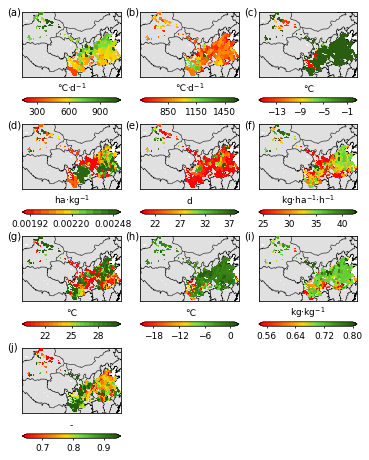

In [206]:
fig = plt.figure(figsize=(6,7.9))
items=['TSUM1','TSUM2','DTSM0','SLATB', 'SPAN', 'AMAXTB', 'TMPFTB', 'TMNFTB', 'CVO', 'shift_dvs']
units=['$\mathrm{℃·d}^{-1}$','$\mathrm{℃·d}^{-1}$','℃','$ \mathrm{ha}$'+'$\cdot$'+'$ \mathrm{kg}^{-1}$', \
       'd', '$ \mathrm{kg}$'+'$\cdot$'+'$ \mathrm{ha}^{-1}$'+'$\cdot$'+'$ \mathrm{h}^{-1}$', \
       '℃', '℃', '$ \mathrm{kg}$'+'$\cdot$'+'$ \mathrm{kg}^{-1}$', '-']
n_colors=[6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6]

def appr(a):
    for s in [0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000,100000]:
        if abs(a)<s:
            a=round(a/s*100)*s/100
            break
    return a,s/100

for i in range(1,11):
    item=items[i-1]
    unit=units[i-1]
    if i==10:
        ax =  plt.subplot2grid((4,3), (3, 0))
    else:
        ax = fig.add_subplot(430+i)

    ds=gdal.Open('./参数空间化结果/%s_2007-2009_V2-3.tif'%item)
    data=ds.ReadAsArray()
    gt=ds.GetGeoTransform() #分辨率严格为0.01°
    # extent = (gt[0], gt[0] + ds.RasterXSize * gt[1],
    #           gt[3] + ds.RasterYSize * gt[5], gt[3])

    m = Basemap(rsphere=(6378137.00,6356752.31414),llcrnrlon=82, llcrnrlat=23, \
        urcrnrlon=126, urcrnrlat=47, projection='aea',  resolution='l', \
        lat_1=25, lat_2=53, lon_0=105, ax = ax) 
    m.fillcontinents(color='#e0e0e0',lake_color=None)
    shpfile = 'D:/hh/矢量边界/中国9段线边界'             
    m.readshapefile(shpfile, 'China') 

    # #绘制经纬线
    # parallels = np.arange(10.,90,5.) 
    # m.drawparallels(parallels,labels=[1,0,0,0],fontsize=9, zorder=2, linewidth=0.5) # 绘制纬线
    # meridians = np.arange(70.,180.,10.)
    # m.drawmeridians(meridians,labels=[0,0,1,0],fontsize=9, zorder=2, linewidth=0.5) # 绘制经线

    colors = ['red','orangered',"darkorange", "gold", "#72de40", "#42971a",'#27590f']
    nodes = [0.0, 0.15, 0.3, 0.45, 0.6, 0.8, 1.0]
    cm = LinearSegmentedColormap.from_list("mycmap", list(zip(nodes, colors)))

    new_data = np.ma.masked_where(data==0, data)

    x = linspace(gt[0], gt[0] + ds.RasterXSize * gt[1], ds.RasterXSize)
    y = linspace(gt[3], gt[3] + ds.RasterYSize * gt[5], ds.RasterYSize)
    xx, yy = meshgrid(x, y)

    temp=[a for a in data.flatten() if a]

    q1,q2=np.percentile(temp,0.05),np.percentile(temp,99.95)#自行修改分位数比例
    n_color=int((appr(q2)[0]-appr(q1)[0])*2/appr(q1)[1])+1
#     print(appr(q2)[0],appr(q1)[0],n_color)

#     cs=m.contourf(xx, yy,new_data,cmap=cm,latlon=True,zorder=3,extend='both')
    cs=m.contourf(xx, yy,new_data,cmap=cm,levels=np.linspace(q1,q2,n_color),latlon=True,zorder=3,extend='both')
    bar=fig.colorbar(cs,orientation='horizontal',fraction=0.05, pad=0.22)#fraction调整colorbar大小，pad间距
    # bar.ax.tick_params(size=0,labelsize=1,labelcolor='white')#不显示ticks和labels
    bar.ax.tick_params(size=2,labelsize=9,labelcolor='black')
    if i==1:
        ticks = bar.set_ticks([300,600,900])    
    if i==2:
        ticks = bar.set_ticks([850,1150,1450])
    if i==3:
        ticks = bar.set_ticks([-13,-9,-5,-1])  
    if i==4:
        ticks = bar.set_ticks([0.00192,0.00220,0.00248]) 
#         bar.ax.ticklabel_format(style='sci')
    if i==5:
        ticks = bar.set_ticks([22,27,32,37])         
    if i==6:
        ticks = bar.set_ticks([25,30,35,40])          
    if i==7:
        ticks = bar.set_ticks([22,25,28])
    if i==8:
        ticks = bar.set_ticks([-18,-12,-6,0])        
    if i==9:
        ticks = bar.set_ticks([0.56,0.64,0.72,0.8]) 
    if i==10:
        ticks = bar.set_ticks([0.7,0.80,0.9])
    bar.ax.set_title(unit, loc='center', fontsize=9) 

fig.text(0.09,0.87,'(a)')
fig.text(0.363,0.87,'(b)')
fig.text(0.6375,0.87,'(c)')
fig.text(0.09,0.67,'(d)')
fig.text(0.363,0.67,'(e)')
fig.text(0.6375,0.67,'(f)')
fig.text(0.09,0.475,'(g)')
fig.text(0.363,0.475,'(h)')
fig.text(0.6375,0.475,'(i)')
fig.text(0.09,0.28,'(j)')
# fig.text(0.4,0.25,'(a) TSUM1   (b) TSUM2   (c) ${DTSM}_{0}$')
# fig.text(0.4,0.22,'(d) SLATB    (e) SPAN       (f) AMAXTB')
# fig.text(0.4,0.19,'(g) TMPFTB (h) TMNFTB  (i) FSTB')
# fig.text(0.4,0.16,'(j) FOTB')
fig.savefig('./参数空间化结果/2007-2009_V2-3.png',dpi=600,bbox_inches='tight')